## Hierarchical Clustering

In [1]:
# Adapted from Dibakar Sigdel
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline
import json

data = pd.read_csv('../../result/caseolap.csv')
data = data.set_index('protein')
ndf = data
total_col = []
for i in range(0,len(ndf)):
    total = 0
    for j in range(0,18):
        total += ndf.iloc[i,j]
    total_col.append(total)
ndf = ndf.assign(Total = total_col)
ndata = ndf.copy(deep = True)

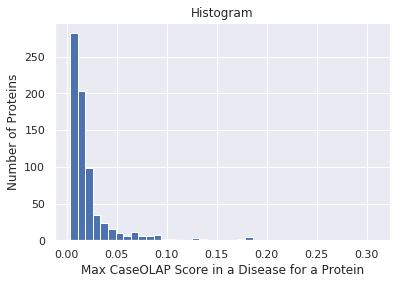

In [2]:
# Make historgram
max_scores = []
for i in range(0,len(ndf)):
    row = list(ndf.iloc[i,0:19])
    max_scores.append(max(row))
plt.hist(max_scores, bins = 40)  
plt.xlabel('Max CaseOLAP Score in a Disease for a Protein');
plt.ylabel('Number of Proteins');
plt.title('Histogram');

In [3]:
solid_cutoff = [0.0]*18
mdata = ndata.copy(deep =True)
dis = ["LHON", "MELAS", "ADOA", "Leigh", "MERRF", "KSS", "Alpers", "LBSL", "PDD", "PEO", "MS", "Parkin", "ALS", "AD", "Epil", "Schiz", "FA", "HSP", "WD"]
idx = list(mdata.index)
data_dict = []
max_list = []
for item in idx:
    data = mdata.loc[item,:]
    lst =[data[0],data[1],data[2],data[3],data[4],data[5],data[6],data[7],data[8],data[9],data[10],data[11],data[12],data[13],data[14],data[15],data[16],data[17],data[18]]
    m = max(lst)
    max_list.append(m)
    for e,cut in zip(lst,solid_cutoff):
        if e == m:
            if e > cut:
                    data_dict.append({"protein":item,"LHON":data[0],"MELAS":data[1], "ADOA":data[2],"Leigh":data[3],"MERRF":data[4],"KSS":data[5],"Alpers":data[6],"LBSL":data[7], "PDD":data[8], "PEO":data[9],"MS":data[10],"Parkin":data[11],"ALS":data[12],"AD":data[13],"Epil":data[14],"Schiz":data[15],"FA":data[16],"HSP":data[17],"WD":data[18],"Total":data[19]})
ndf_copy = ndf.copy()
ndf = ndf.iloc[:,0:19]

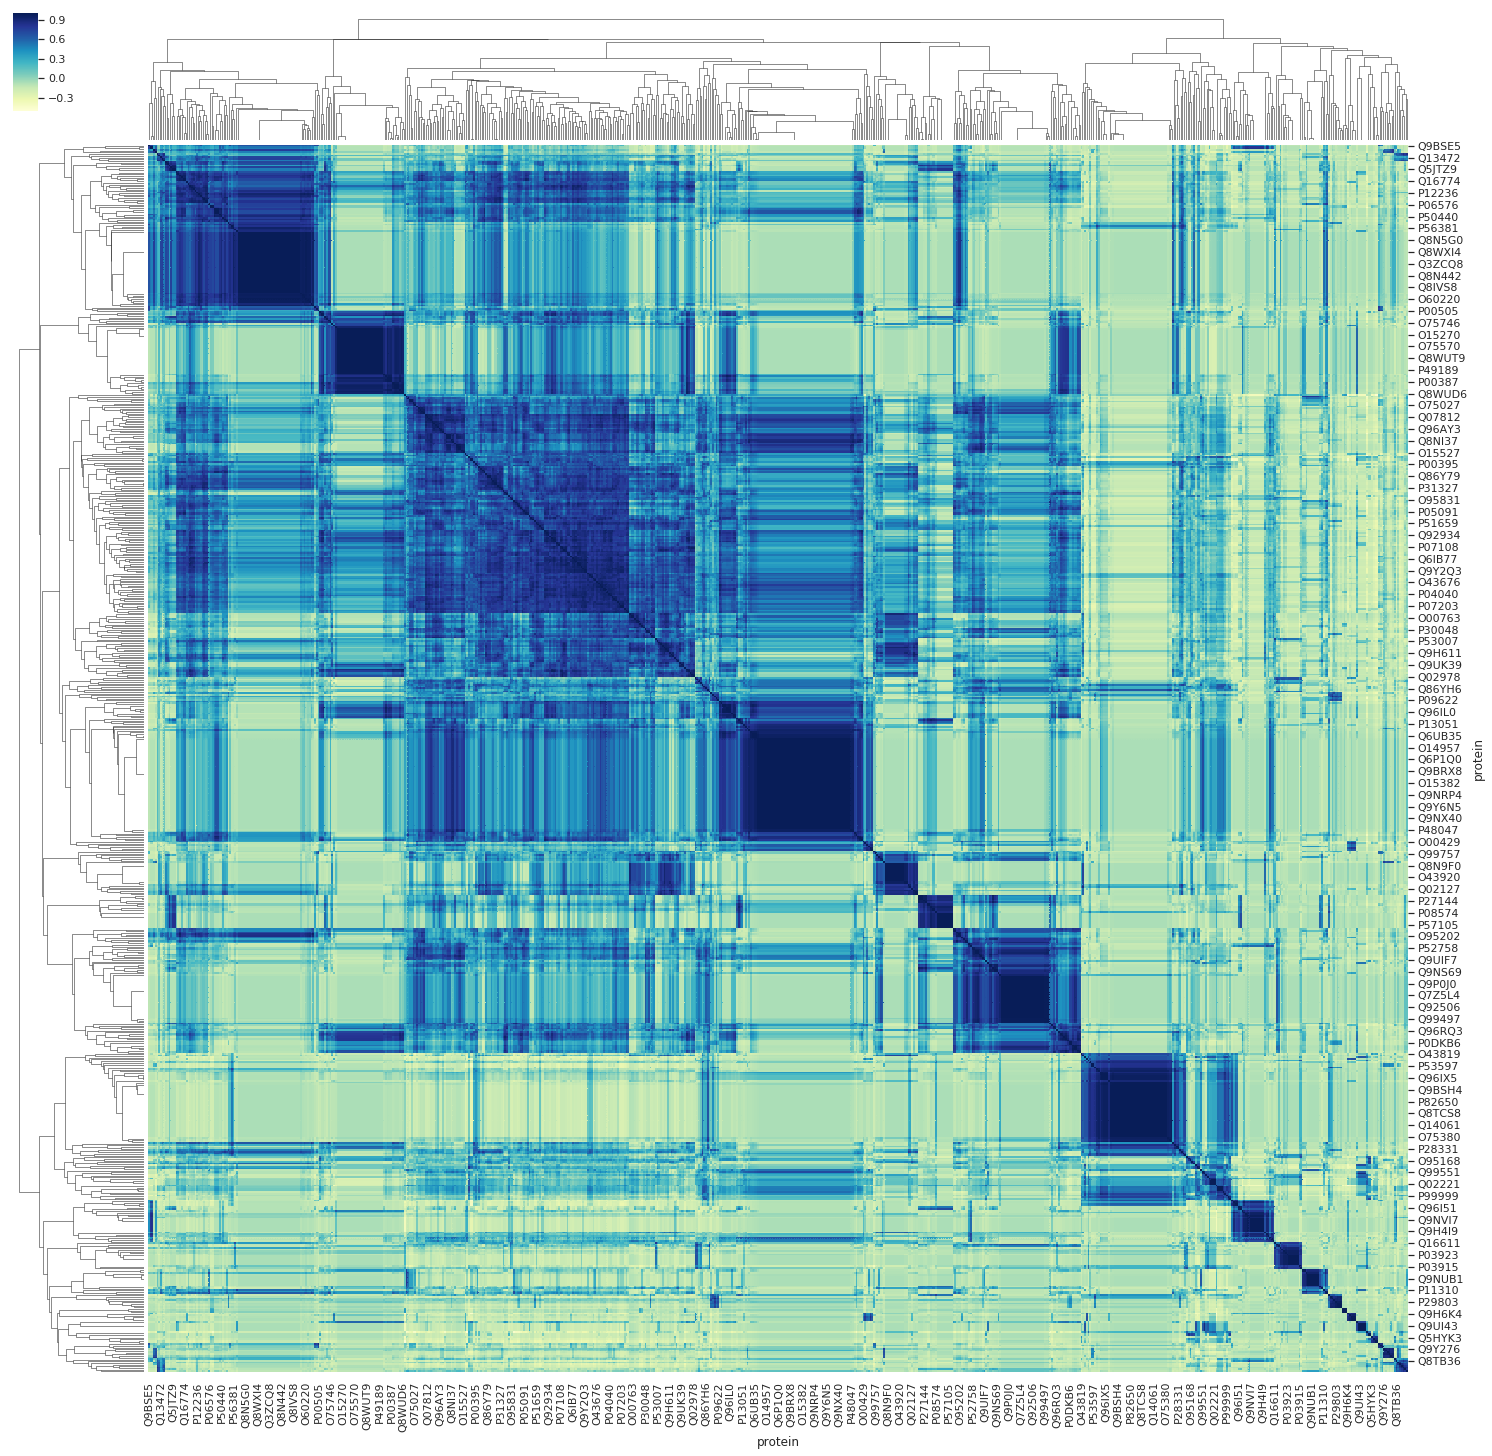

In [5]:
# Make hierarchical cluster figure
size=(25,25)
g = sns.clustermap(ndf.T.corr(),\
                   figsize=size,\
                   cmap = "YlGnBu",\
                   metric='seuclidean')
g.savefig('Data/cluster.pdf', format='pdf', dpi=300)
g.savefig('Data/cluster.png', format='png', dpi=300)


indx = g.dendrogram_row.reordered_ind

protein_cluster = []
for num in indx:
    for i,ndx in enumerate(ndf.index):
         if num == i:
                protein_cluster.append({'id':i,"protein": ndx,"LHON":list(ndf.loc[ndx,:])[0],"MELAS":list(ndf.loc[ndx,:])[1],"ADOA":list(ndf.loc[ndx,:])[2],"Leigh":list(ndf.loc[ndx,:])[3],"MERRF":list(ndf.loc[ndx,:])[4],"KSS":list(ndf.loc[ndx,:])[5],"Alpers":list(ndf.loc[ndx,:])[6],"LBSL":list(ndf.loc[ndx,:])[7],"PDD":list(ndf.loc[ndx,:])[8],"PEO":list(ndf.loc[ndx,:])[9],"MS":list(ndf.loc[ndx,:])[10],"Parkin":list(ndf.loc[ndx,:])[11],"ALS":list(ndf.loc[ndx,:])[12],"AD":list(ndf.loc[ndx,:])[13],"Epil":list(ndf.loc[ndx,:])[14],"Schiz":list(ndf.loc[ndx,:])[15],"FA":list(ndf.loc[ndx,:])[16],"HSP":list(ndf.loc[ndx,:])[17],"WD":list(ndf.loc[ndx,:])[18]})


In [6]:
# Make spreadsheet with list of proteins ordered based on cluster distance, with scores for each disease category
protein_cluster_df = pd.DataFrame(protein_cluster)
protein_cluster_df = protein_cluster_df.set_index("protein")
protein_cluster_df = protein_cluster_df.drop(["id"], axis = 1)
protein_cluster_df.to_csv('Data/protein-cluster-spreadsheet.csv')

In [7]:
# Make a barplot of the previous spreadsheet
protein_cluster_df.plot.barh(stacked=True,figsize=(100,200))
plt.gca().invert_yaxis()
plt.legend(fontsize =10)
plt.savefig('Data/cluster-bar.pdf')
plt.savefig('Data/cluster-bar.png')
plt.show()

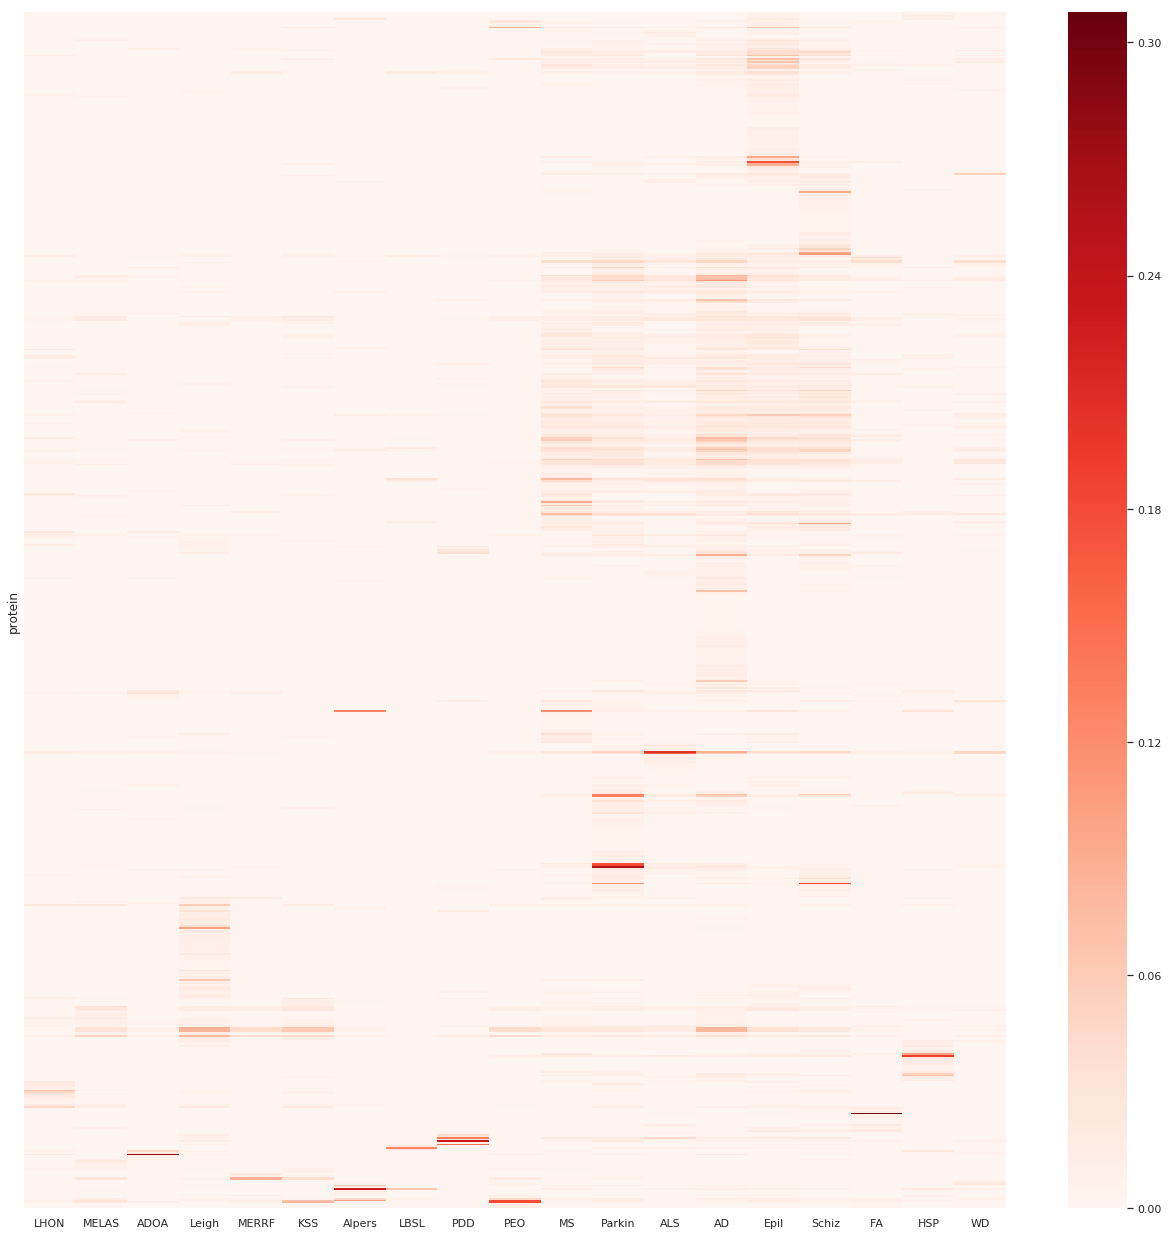

In [8]:
# Make heatmap of proteins (Y-axis) and scores (color) in diseases (X-axis)
plt.figure(figsize = [22,22])
sns.heatmap(protein_cluster_df, cmap="Reds",\
            #cmap = sns.cubehelix_palette(1000),\
            #cmap = sns.cubehelix_palette(8, start=.5, rot=-.75),\
            #cmap = sns.color_palette("Blues"),\
            yticklabels=False, vmin = 0,vmax = max(max_list))
plt.savefig('Data/heatmap-cutoff-solid.pdf')